In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline

In [2]:
cd D:\Projects\Policy Evaluation\dofiles\

D:\Projects\Policy Evaluation\dofiles


In [3]:
fp =  "..\input_data\leading_pedestrian_interval_signals_shapefile_2263\leading_pedestrian_interval_signals_shapefile_2263.shp"
LPIS_data = gpd.read_file(fp)

In [4]:
LPIS_data.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,POINT (992974.9999266018 186489.9997614889)
1,Guyon Avenue,So Railroad Avenue,2018-01-09,2,POINT (949031.9998856507 144943.9995205229)
2,Broadway,36 Street,2018-01-09,3,POINT (1006026.000071445 216210.9997024141)


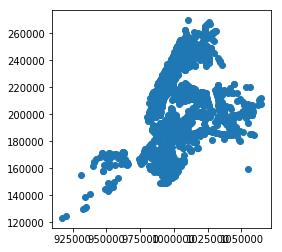

In [5]:
LPIS_data.plot()

In [6]:
LPIS_data.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [17]:
type(LPIS_data)

geopandas.geodataframe.GeoDataFrame

In [18]:
LPIS_data.crs['units']

'us-ft'

In [22]:
LPIS_data.columns

Index(['MainStreet', 'CrossStree', 'Install_Da', 'ID', 'geometry'], dtype='object')

In [19]:
LPIS_data.geometry = LPIS_data['geometry'].buffer(2000)

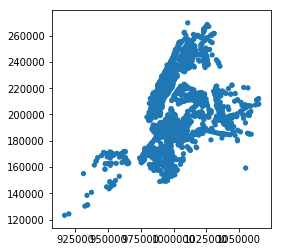

In [20]:
LPIS_data.plot()

In [23]:
LPIS_data.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,"POLYGON ((994974.9999266018 186489.9997614889,..."
1,Guyon Avenue,So Railroad Avenue,2018-01-09,2,"POLYGON ((951031.9998856507 144943.9995205229,..."
2,Broadway,36 Street,2018-01-09,3,"POLYGON ((1008026.000071445 216210.9997024141,..."


In [29]:
cd D:\Projects\Policy Evaluation\input_data\notebook_output
LPIS_data.to_file('LPIS_buffer.shp',driver ='ESRI Shapefile')

D:\Projects\Policy Evaluation\input_data\notebook_output


Tested the output in QGIS. It is exactly the same as the LPIS buffer I've created in QGIS.

Bringing in the intersection dataframe

In [32]:
fp =  "D:\Projects\Policy Evaluation\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
intersection_data = gpd.read_file(fp)

In [33]:
intersection_data.head()

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847)
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,8.0,1101045352991,Mundy Ln,M,S1400,110391524427,E 241st St,M,S1400,1028203.781,268236.7883,36005,Bronx,Bronx,Bronx County,POINT (1028203.781452508 268236.7883355191)
4,9.0,1101045352991,Mundy Ln,M,S1400,110391525873,Pitman Ave,M,S1400,1028580.253,266444.5479,36005,Bronx,Bronx,Bronx County,POINT (1028580.253206685 266444.547937153)


In [35]:
intersection_data.columns

Index(['fid', 'linearid', 'fullname', 'rttyp', 'mtfcc', 'linearid_2',
       'fullname_2', 'rttyp_2', 'mtfcc_2', 'longitude', 'latitude', 'bcode',
       'bname', 'name', 'namelsad', 'geometry'],
      dtype='object')

Perform spatial join:
Intention:
Capture all intersection_id that fall within each LPIS polygon. (Something like a 1:many merge, but spatially)

In [47]:
intersection_data.crs = LPIS_data.crs
LPIS_with_intersection = gpd.sjoin(LPIS_data,intersection_data[['fid', 'geometry']], how='inner', op='intersects')


In [49]:
LPIS_with_intersection.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry,index_right,fid
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,"POLYGON ((994974.9999266018 186489.9997614889,...",16303,42526.0
87,Underhill Avenue,St Marks Avenie,2017-11-03,88,"POLYGON ((995775.3989163449 186266.9933177325,...",16303,42526.0
89,Atlantic Avenue,FT GREENE PLACE,2017-11-08,90,"POLYGON ((992920.3993769779 188296.9931947279,...",16303,42526.0


In [53]:
filtered_data = LPIS_with_intersection[LPIS_with_intersection["ID"]==1]
print(filtered_data)

           MainStreet        CrossStree  Install_Da  ID  \
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
..                ...               ...         ...  ..   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   
0   Vanderbilt Avenue  St Mark's Avenue  2018-01-08   1   

                                             geometry  index_right      fid  
0   POLYGON ((994974.9999266018 186489.9997614889,...        16303  42526.0  
0   POLYGON ((994974.9999266018 186489.9997614889,...        16493  43022.0  
..                                                ...          ...      ...  
0   POLYGON ((994974.9999266018 186489.9997614889,...        10063  29841.0  
0   POLYGON ((994974.9999266018 186489.9997614889,...        18005  48922.0  

[77 rows x 7 columns]


In [55]:
cd D:\Projects\Policy Evaluation\input_data\notebook_output

D:\Projects\Policy Evaluation\input_data\notebook_output


In [56]:
LPIS_with_intersection.to_file('LPIS_buffer_intersections.shp',driver ='ESRI Shapefile')

saved out to check in QGIS and Stata.
Checks out. 
Now I have all intersections within each LPIS buffer.